In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle("./data/rolling_averages_with_opponent_and_predictions.pkl")
df = df.dropna()
df = df.drop_duplicates(subset=["GAME_ID"], keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9389 entries, 34 to 19036
Columns: 185 entries, GAME_ID to GAME_TYPE
dtypes: bool(2), float32(1), float64(175), int64(2), object(5)
memory usage: 13.2+ MB


In [4]:
df.describe()

,TEAM_ID,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS,NN_PREDICTION,PERCENTAGE_ERROR
count,9.389000e+03,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389.000000,9389

In [5]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,OPP_TEAM_ID,OPP_TEAM_ABBREVIATION,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG,PLUS_MINUS,NN_PREDICTION,WIN,NN_WIN,PERCENTAGE_ERROR,GAME_TYPE
34,0021500018,1610612754,IND,32.0,86.0,0.372,9.0,23.0,0.391,26.0,31.0,0.839,8.0,32.0,40.0,23.0,14.0,3.0,13.0,30.0,99.0,94.6,95.2,97.1,101.9,-2.5,-6.7,0.719,1.77,17.0,0.193,0.700,0.430,12.424,12.5,0.424,0.497,0.201,106.90,104.0,86.67,104.0,0.477,0.360,0.494,0.488,0.192,0.300,18.0,10.0,20.0,36.0,12.0,22.0,9.0,46.0,2.0,24.0,0.733,0.267,0.465,0.101,0.273,0.202,0.263,0.182,0.364,0.609,0.391,1.000,0.000,0.719,0.281,16.82,41.0,73.0,108.0,421.0,2.0,0.0,295.0,22.0,51.0,0.431,14.0,29.0,0.483,14.0,20.0,0.700,1610612763,MEM,29.0,82.0,0.354,2.0,16.0,0.125,16.0,22.0,0.7270,11.0,29.0,40.0,15.0,8.0,3.0,16.0,18.0,76.0,78.6,78.40,107.60,108.2,-29.00,-29.8,0.5170,0.940,12.2,0.2140,0.6810,0.427,16.5490,16.5,0.3660,0.4140,0.201,97.58,97.50,81.25,97.0,0.3000,0.2680,0.565,0.202,0.1930,0.3190,12.0,7.0,8.0,36.0,23.0,14.0,26.0,48.0,2.0,25.0,0.805,0.195,0.7110,0.2370,0.079,0.105,0.2110,0.1580,0.4740,0.481,0.519,1.0000,0.0000,0.5170,0.4830,16.650,32.0,65.0,94.0,420.0,6.0,1.0,303.0,18.0,31.0,0.581,23.0,53.0,0.434,11.0,18.0,0.611,-9,-4.331128,False,False,0.518764,CLOSE
36,0021500019,1610612752,NYK,42.0,93.0,0.452,9.0,23.0,0.391,29.0,35.0,0.829,19.0,30.0,49.0,24.0,11.0,7.0,11.0,28.0,122.0,121.5,124.5,97.4,98.0,24.2,26.5,0.571,2.18,16.7,0.389,0.614,0.505,10.956,11.2,0.500,0.563,0.198,100.02,98.5,82.08,98.0,0.646,0.376,0.401,0.360,0.181,0.386,25

# Modeling on scaled data

In [6]:
cols_needed = [
    'FGM_AVG','FGA_AVG','FG_PCT_AVG','FG3M_AVG','FG3A_AVG','FG3_PCT_AVG','FTM_AVG',
    'FTA_AVG','FT_PCT_AVG','OREB_AVG','DREB_AVG','REB_AVG','AST_AVG','STL_AVG',
    'BLK_AVG','TO_AVG','PF_AVG','PTS_AVG','E_OFF_RATING_AVG','OFF_RATING_AVG',
    'E_DEF_RATING_AVG','DEF_RATING_AVG','E_NET_RATING_AVG','NET_RATING_AVG',
    'AST_PCT_AVG','AST_TOV_AVG','AST_RATIO_AVG','OREB_PCT_AVG','DREB_PCT_AVG',
    'REB_PCT_AVG','E_TM_TOV_PCT_AVG','TM_TOV_PCT_AVG','EFG_PCT_AVG','TS_PCT_AVG',
    'E_USG_PCT_AVG','E_PACE_AVG','PACE_AVG','PACE_PER40_AVG','POSS_AVG','PIE_AVG',
    'FTA_RATE_AVG','OPP_EFG_PCT_AVG','OPP_FTA_RATE_AVG','OPP_TOV_PCT_AVG','OPP_OREB_PCT_AVG',
    'PTS_OFF_TOV_AVG','PTS_2ND_CHANCE_AVG','PTS_FB_AVG','PTS_PAINT_AVG','OPP_PTS_OFF_TOV_AVG',
    'OPP_PTS_2ND_CHANCE_AVG','OPP_PTS_FB_AVG','OPP_PTS_PAINT_AVG','BLKA_AVG','PFD_AVG',
    'PCT_FGA_2PT_AVG','PCT_FGA_3PT_AVG','PCT_PTS_2PT_AVG','PCT_PTS_2PT_MR_AVG','PCT_PTS_3PT_AVG',
    'PCT_PTS_FB_AVG','PCT_PTS_FT_AVG','PCT_PTS_OFF_TOV_AVG','PCT_PTS_PAINT_AVG','PCT_AST_2PM_AVG',
    'PCT_UAST_2PM_AVG','PCT_AST_3PM_AVG','PCT_UAST_3PM_AVG','PCT_AST_FGM_AVG','PCT_UAST_FGM_AVG',
    'DIST_AVG','ORBC_AVG','DRBC_AVG','RBC_AVG','TCHS_AVG','SAST_AVG','FTAST_AVG','PASS_AVG',
    'CFGM_AVG','CFGA_AVG','CFG_PCT_AVG','UFGM_AVG','UFGA_AVG','UFG_PCT_AVG','DFGM_AVG','DFGA_AVG',
    'DFG_PCT_AVG','FGM_OPP_AVG','FGA_OPP_AVG','FG_PCT_OPP_AVG','FG3M_OPP_AVG','FG3A_OPP_AVG',
    'FG3_PCT_OPP_AVG','FTM_OPP_AVG','FTA_OPP_AVG','FT_PCT_OPP_AVG','OREB_OPP_AVG','DREB_OPP_AVG',
    'REB_OPP_AVG','AST_OPP_AVG','STL_OPP_AVG','BLK_OPP_AVG','TO_OPP_AVG','PF_OPP_AVG','PTS_OPP_AVG',
    'E_OFF_RATING_OPP_AVG','OFF_RATING_OPP_AVG','E_DEF_RATING_OPP_AVG','DEF_RATING_OPP_AVG',
    'E_NET_RATING_OPP_AVG','NET_RATING_OPP_AVG','AST_PCT_OPP_AVG','AST_TOV_OPP_AVG','AST_RATIO_OPP_AVG',
    'OREB_PCT_OPP_AVG','DREB_PCT_OPP_AVG','REB_PCT_OPP_AVG','E_TM_TOV_PCT_OPP_AVG','TM_TOV_PCT_OPP_AVG',
    'EFG_PCT_OPP_AVG','TS_PCT_OPP_AVG','E_USG_PCT_OPP_AVG','E_PACE_OPP_AVG','PACE_OPP_AVG','PACE_PER40_OPP_AVG',
    'POSS_OPP_AVG','PIE_OPP_AVG','FTA_RATE_OPP_AVG','OPP_EFG_PCT_OPP_AVG','OPP_FTA_RATE_OPP_AVG','OPP_TOV_PCT_OPP_AVG',
    'OPP_OREB_PCT_OPP_AVG','PTS_OFF_TOV_OPP_AVG','PTS_2ND_CHANCE_OPP_AVG','PTS_FB_OPP_AVG','PTS_PAINT_OPP_AVG',
    'OPP_PTS_OFF_TOV_OPP_AVG','OPP_PTS_2ND_CHANCE_OPP_AVG','OPP_PTS_FB_OPP_AVG','OPP_PTS_PAINT_OPP_AVG','BLKA_OPP_AVG',
    'PFD_OPP_AVG','PCT_FGA_2PT_OPP_AVG','PCT_FGA_3PT_OPP_AVG','PCT_PTS_2PT_OPP_AVG','PCT_PTS_2PT_MR_OPP_AVG',
    'PCT_PTS_3PT_OPP_AVG','PCT_PTS_FB_OPP_AVG','PCT_PTS_FT_OPP_AVG','PCT_PTS_OFF_TOV_OPP_AVG','PCT_PTS_PAINT_OPP_AVG',
    'PCT_AST_2PM_OPP_AVG','PCT_UAST_2PM_OPP_AVG','PCT_AST_3PM_OPP_AVG','PCT_UAST_3PM_OPP_AVG','PCT_AST_FGM_OPP_AVG',
    'PCT_UAST_FGM_OPP_AVG','DIST_OPP_AVG','ORBC_OPP_AVG','DRBC_OPP_AVG','RBC_OPP_AVG','TCHS_OPP_AVG','SAST_OPP_AVG',
    'FTAST_OPP_AVG','PASS_OPP_AVG','CFGM_OPP_AVG','CFGA_OPP_AVG','CFG_PCT_OPP_AVG','UFGM_OPP_AVG','UFGA_OPP_AVG',
    'UFG_PCT_OPP_AVG','DFGM_OPP_AVG','DFGA_OPP_AVG','DFG_PCT_OPP_AVG'
]


In [7]:
#cols = df.drop(columns=["GAME_ID","TEAM_ID","TEAM_ABBREVIATION","OPP_TEAM_ID","OPP_TEAM_ABBREVIATION","PLUS_MINUS"]).columns
target = "PLUS_MINUS"
X = df[cols_needed]
y = df[target]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
X_train

,FGM_AVG,FGA_AVG,FG_PCT_AVG,FG3M_AVG,FG3A_AVG,FG3_PCT_AVG,FTM_AVG,FTA_AVG,FT_PCT_AVG,OREB_AVG,DREB_AVG,REB_AVG,AST_AVG,STL_AVG,BLK_AVG,TO_AVG,PF_AVG,PTS_AVG,E_OFF_RATING_AVG,OFF_RATING_AVG,E_DEF_RATING_AVG,DEF_RATING_AVG,E_NET_RATING_AVG,NET_RATING_AVG,AST_PCT_AVG,AST_TOV_AVG,AST_RATIO_AVG,OREB_PCT_AVG,DREB_PCT_AVG,REB_PCT_AVG,E_TM_TOV_PCT_AVG,TM_TOV_PCT_AVG,EFG_PCT_AVG,TS_PCT_AVG,E_USG_PCT_AVG,E_PACE_AVG,PACE_AVG,PACE_PER40_AVG,POSS_AVG,PIE_AVG,FTA_RATE_AVG,OPP_EFG_PCT_AVG,OPP_FTA_RATE_AVG,OPP_TOV_PCT_AVG,OPP_OREB_PCT_AVG,PTS_OFF_TOV_AVG,PTS_2ND_CHANCE_AVG,PTS_FB_AVG,PTS_PAINT_AVG,OPP_PTS_OFF_TOV_AVG,OPP_PTS_2ND_CHANCE_AVG,OPP_PTS_FB_AVG,OPP_PTS_PAINT_AVG,BLKA_AVG,PFD_AVG,PCT_FGA_2PT_AVG,PCT_FGA_3PT_AVG,PCT_PTS_2PT_AVG,PCT_PTS_2PT_MR_AVG,PCT_PTS_3PT_AVG,PCT_PTS_FB_AVG,PCT_PTS_FT_AVG,PCT_PTS_OFF_TOV_AVG,PCT_PTS_PAINT_AVG,PCT_AST_2PM_AVG,PCT_UAST_2PM_AVG,PCT_AST_3PM_AVG,PCT_UAST_3PM_AVG,PCT_AST_FGM_AVG,PCT_UAST_FGM_AVG,DIST_AVG,ORBC_AVG,DRBC_AVG,RBC_AVG,TCHS_AVG,SAST_AVG,FTAST_AVG,PASS_AVG,CFGM_AVG,CFGA_AVG,CFG_PCT_AVG,UFGM_AVG,UFGA_AVG,UFG_PCT_AVG,DFGM_AVG,DFGA_AVG,DFG_PCT_AVG,FGM_OPP_AVG,FGA_OPP_AVG,FG_PCT_OPP_AVG,FG3M_OPP_AVG,FG3A_OPP_AVG,FG3_PCT_OPP_AVG,FTM_OPP_AVG,FTA_OPP_AVG,FT_PCT_OPP_AVG,OREB_OPP_AVG,DREB_OPP_AVG,REB_OPP_AVG,AST_OPP_AVG,STL_OPP_AVG,BLK_OPP_AVG,TO_OPP_AVG,PF_OPP_AVG,PTS_OPP_AVG,E_OFF_RATING_OPP_AVG,OFF_RATING_OPP_AVG,E_DEF_RATING_OPP_AVG,DEF_RATING_OPP_AVG,E_NET_RATING_OPP_AVG,NET_RATING_OPP_AVG,AST_PCT_OPP_AVG,AST_TOV_OPP_AVG,AST_RATIO_OPP_AVG,OREB_PCT_OPP_AVG,DREB_PCT_OPP_AVG,REB_PCT_OPP_AVG,E_TM_TOV_PCT_OPP_AVG,TM_TOV_PCT_OPP_AVG,EFG_PCT_OPP_AVG,TS_PCT_OPP_AVG,E_USG_PCT_OPP_AVG,E_PACE_OPP_AVG,PACE_OPP_AVG,PACE_PER40_OPP_AVG,POSS_OPP_AVG,PIE_OPP_AVG,FTA_RATE_OPP_AVG,OPP_EFG_PCT_OPP_AVG,OPP_FTA_RATE_OPP_AVG,OPP_TOV_PCT_OPP_AVG,OPP_OREB_PCT_OPP_AVG,PTS_OFF_TOV_OPP_AVG,PTS_2ND_CHANCE_OPP_AVG,PTS_FB_OPP_AVG,PTS_PAINT_OPP_AVG,OPP_PTS_OFF_TOV_OPP_AVG,OPP_PTS_2ND_CHANCE_OPP_AVG,OPP_PTS_FB_OPP_AVG,OPP_PTS_PAINT_OPP_AVG,BLKA_OPP_AVG,PFD_OPP_AVG,PCT_FGA_2PT_OPP_AVG,PCT_FGA_3PT_OPP_AVG,PCT_PTS_2PT_OPP_AVG,PCT_PTS_2PT_MR_OPP_AVG,PCT_PTS_3PT_OPP_AVG,PCT_PTS_FB_OPP_AVG,PCT_PTS_FT_OPP_AVG,PCT_PTS_OFF_TOV_OPP_AVG,PCT_PTS_PAINT_OPP_AVG,PCT_AST_2PM_OPP_AVG,PCT_UAST_2PM_OPP_AVG,PCT_AST_3PM_OPP_AVG,PCT_UAST_3PM_OPP_AVG,PCT_AST_FGM_OPP_AVG,PCT_UAST_FGM_OPP_AVG,DIST_OPP_AVG,ORBC_OPP_AVG,DRBC_OPP_AVG,RBC_OPP_AVG,TCHS_OPP_AVG,SAST_OPP_AVG,FTAST_OPP_AVG,PASS_OPP_AVG,CFGM_OPP_AVG,CFGA_OPP_AVG,CFG_PCT_OPP_AVG,UFGM_OPP_AVG,UFGA_OPP_AVG,UFG_PCT_OPP_AVG,DFGM_OPP_AVG,DFGA_OPP_AVG,DFG_PCT_OPP_AVG
10302,41.571429,91.000000,0.457071,10.428571,30.571429,0.341071,15.428571,20.000000,0.767286,9.857143,35.285714,45.142857,26.857143,7.642857,5.500000,16.571429,23.000000,109.000000,102.121429,103.500000,109.464286,112.292857,-7.328571,-8.757143,0.646643,1.708571,18.671429,0.255643,0.727357,0.491500,15.813786,16.085714,0.514714,0.546571,0.199429,106.758571,104.604286,87.171429,105.285714,0.458143,0.220429,0.535357,0.291000,0.138714,0.272643,14.714286,12.571429,15.428571,53.714286,21.857143,15.214286,16.285714,49.428571,6.571429,20.142857,0.663643,0.336357,0.572500,0.076571,0.284429,0.143357,0.142929,0.138857,0.495857,0.569714,0.430286,0.858643,0.141429,0.646643,0.353357,18.242857,25.285714,58.571429,81.857143,425.000000,3.285714,1.928571,297.500000,18.357143,36.214286,0.509357,24.500000,54.928571,0.446071,15.642857,25.357143,0.615500,42.866667,89.266667,0.479133,10.600000,29.733333,0.356600,15.800000,20.933333,0.753467,10.266667,35.600000,45.866667,27.000000,8.266667,7.666667,14.733333,20.466667,112.133333,108.406667,110.620000,99.260000,102.226667,9.140000,8.386667,0.628533,1.867333,19.086667,0.285467,0.746600,0.516933,14.662267,14.966667,0.538667,0.568733,0.197467,102.824000,100.265333,83.554000,101.333333,0.560933,0.235867,0.495200,0.252667,0.162467,0.253400,18.733333,15.533333,15.533333,53.200000,16.933333,11.133333,16.333333,44.533333,3.400000,20.533333,0.666000,0.334000,0.576067,0.102133,0.283067,0.136600,0.140933,0.166200,0.473800,0.54

### Data scaling

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# explaining whitebox model

In [13]:
import joblib
# loading linreg model
linreg = joblib.load("./models/whitebox_models/linreg.pkl")
pca = joblib.load("./models/whitebox_models/pca.pkl")

In [15]:
# perform pca on data
X_train_pca = pca.transform(X_train_scaled)         # just transforming is ok, since the pca model was fitted on the minmax scaled training data
X_test_pca = pca.transform(X_test_scaled)

## explain pca

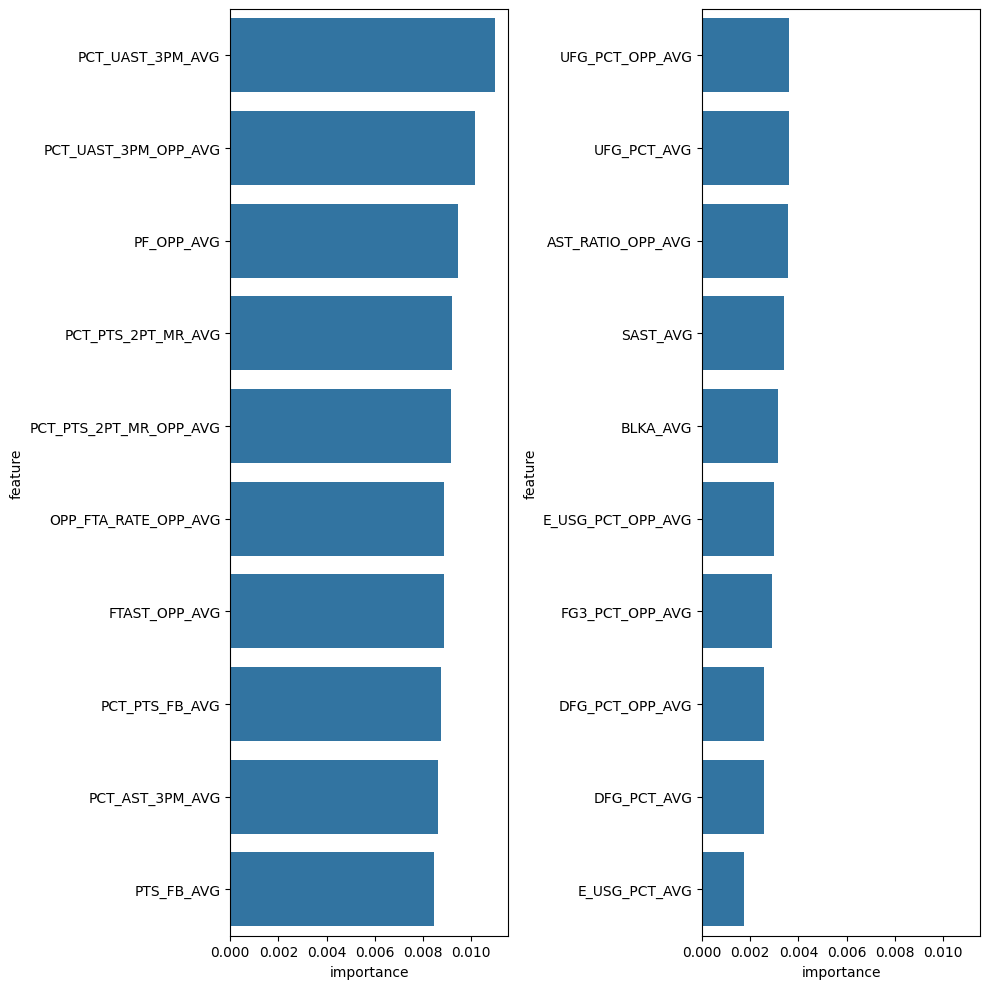

In [24]:
# Assuming pca is your trained PCA model and feature_names is a list of your feature names
loadings = pca.components_

# Compute the absolute values of the loadings
abs_loadings = np.abs(loadings)

# Sum the absolute loadings for each feature
feature_importances = np.sum(abs_loadings, axis=0)

# Normalize the feature importances
feature_importances = feature_importances / np.sum(feature_importances)

# Create a DataFrame
fi_df = pd.DataFrame({'feature': cols_needed, 'importance': feature_importances})

# Sort the DataFrame
fi_df = fi_df.sort_values('importance', ascending=False)

# select the top 10 features
top_10_features = fi_df.head(10)

#select the bottom 10 features
bottom_10_features = fi_df.tail(10)

#plot the top and bottom features in two separate bar plots
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True)
sns.barplot(data=top_10_features, x='importance', y='feature', ax=ax[0])
sns.barplot(data=bottom_10_features, x='importance', y='feature', ax=ax[1])
plt.tight_layout()
plt.show()

C:\Users\mibam\AppData\Local\Temp\ipykernel_24136\3979046431.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(labels)[sorted_idx])


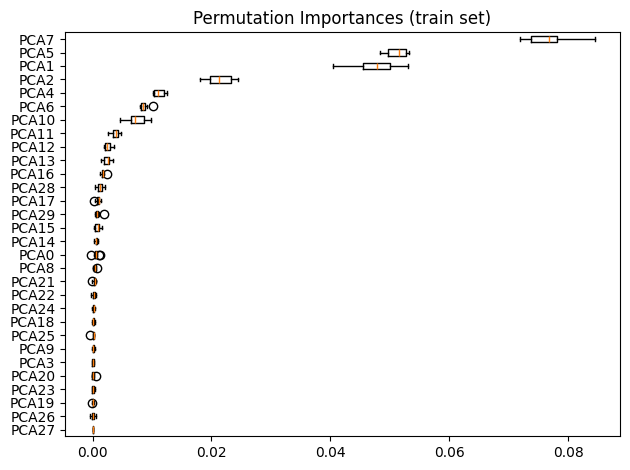

In [30]:
# Explain pca transformed data
from sklearn.inspection import permutation_importance

result = permutation_importance(linreg, X_train_pca, y_train, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
labels = [f"PCA{i}" for i in range(X_train_pca.shape[1])]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(labels)[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

C:\Users\mibam\AppData\Local\Temp\ipykernel_24136\4147260070.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(result_test.importances[sorted_idx_test].T, vert=False, labels=np.array(labels)[sorted_idx_test])


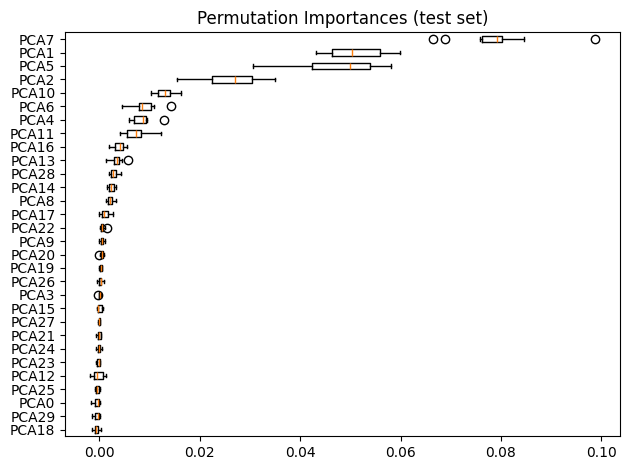

In [71]:
result_test = permutation_importance(linreg, X_test_pca, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx_test = result_test.importances_mean.argsort()
labels = [f"PCA{i}" for i in range(X_test_pca.shape[1])]

fig, ax = plt.subplots()
ax.boxplot(result_test.importances[sorted_idx_test].T, vert=False, labels=np.array(labels)[sorted_idx_test])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

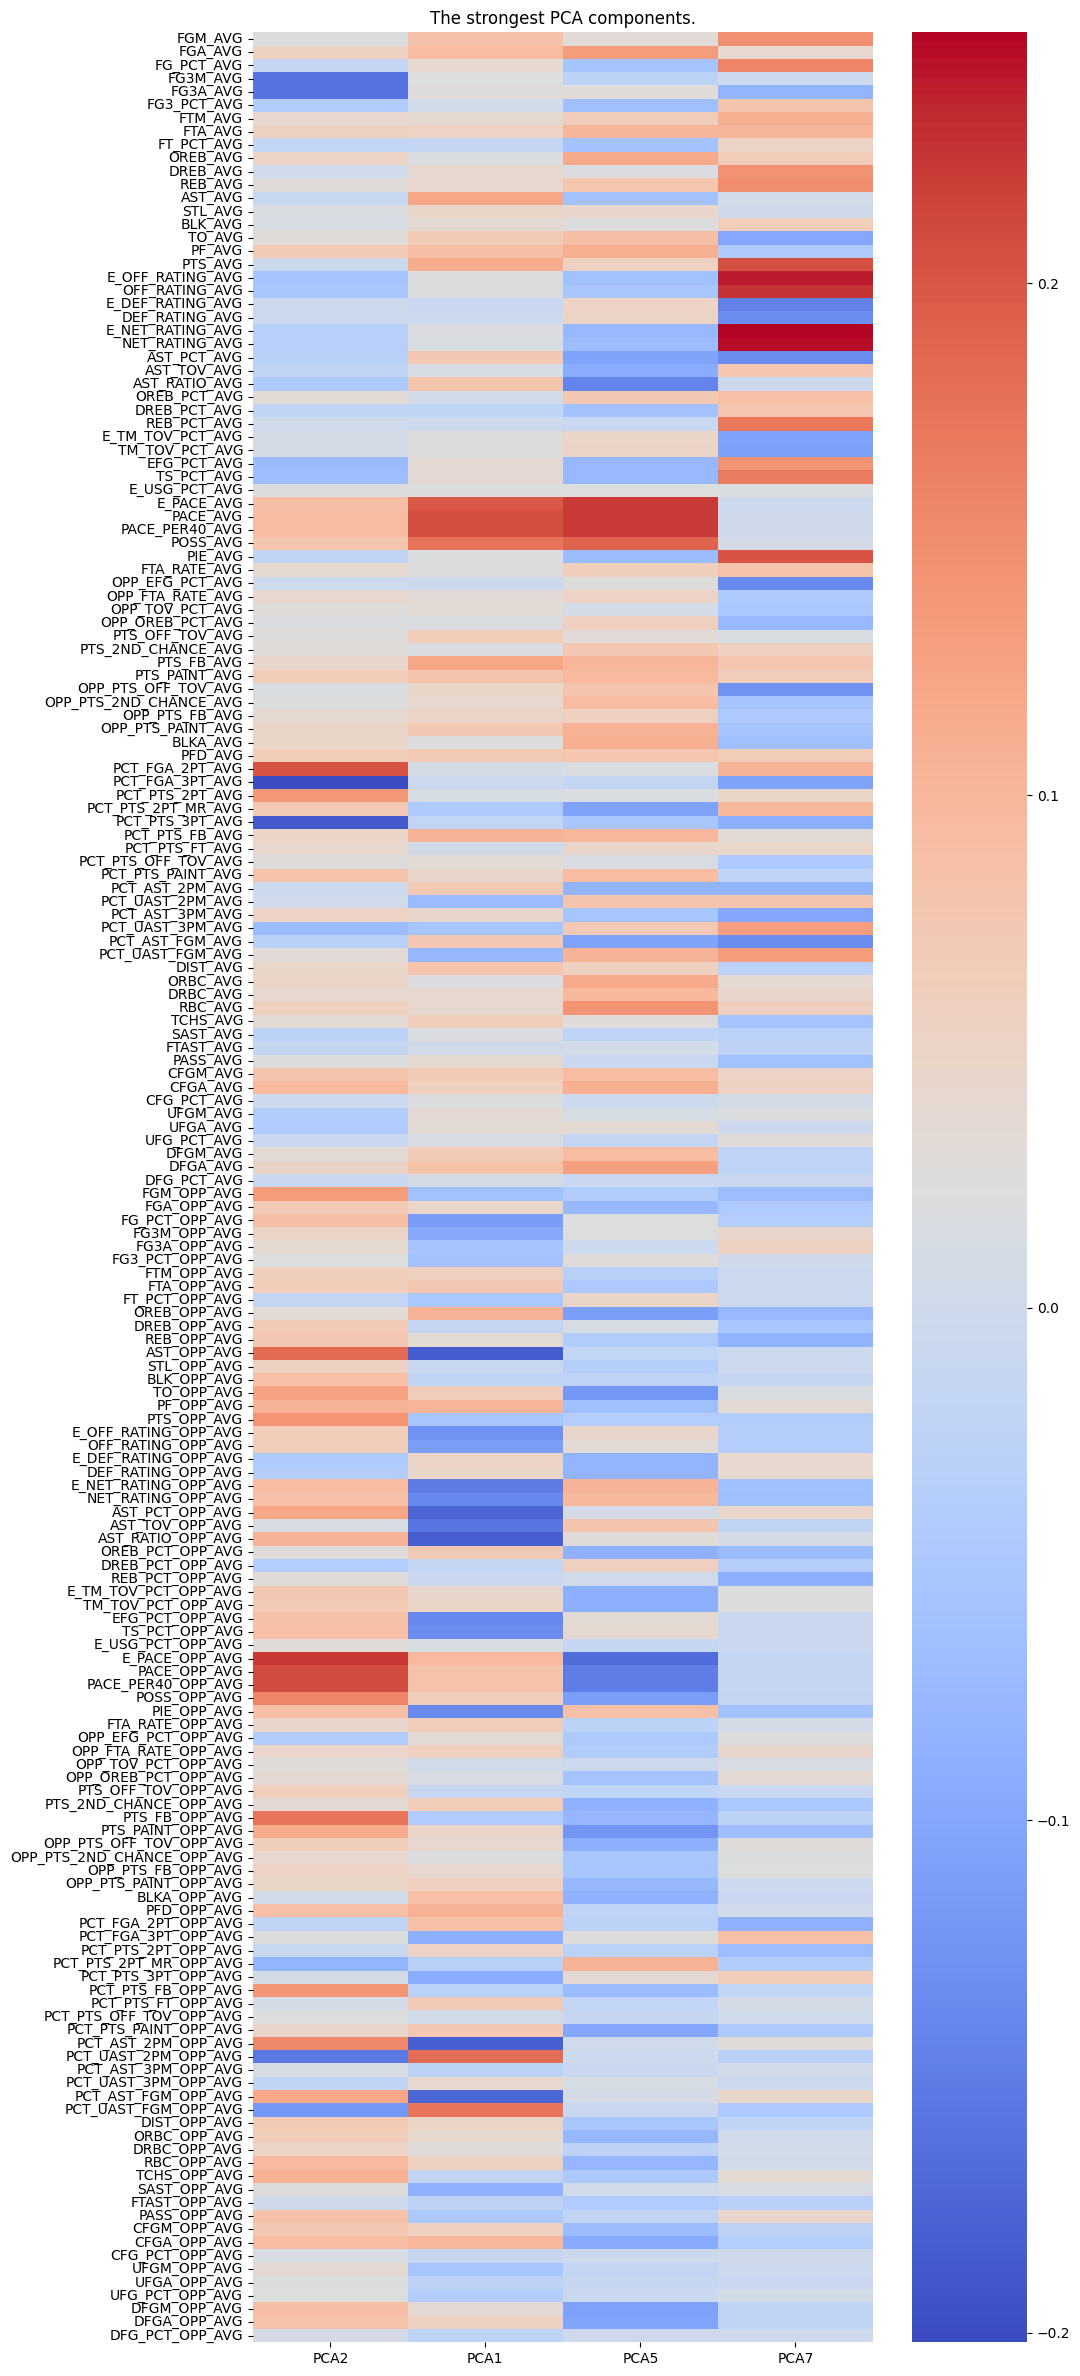

In [58]:
best_pca_idx = sorted_idx[-4:]
best_pca_components = [f"PCA{i}" for i in best_pca_idx]

loadings = pca.components_[best_pca_idx]
# Compute the absolute values of the loadings
abs_loadings = np.abs(loadings)

# Sum the absolute loadings for each feature
feature_importances = np.sum(abs_loadings, axis=0)

# Normalize the feature importances
feature_importances = feature_importances / np.sum(feature_importances)

# Create a DataFrame
fi_df = pd.DataFrame({'feature': cols_needed, 'importance': feature_importances})

# Sort the DataFrame
fi_df = fi_df.sort_values('importance', ascending=False)

# select the top 10 features
top_10_features = fi_df.head(10)

#select the bottom 10 features
bottom_10_features = fi_df.tail(10)

#plot the top features
plot_data = pd.DataFrame(pca.components_[best_pca_idx], columns=cols_needed)
plot_data["PCA"] = best_pca_components
#keep only top 10 and bottom 10 features + pca
#cols_to_keep = ["PCA"] + top_10_features['feature'].values.tolist() + bottom_10_features['feature'].values.tolist()
#plot_data = plot_data[cols_to_keep]

fig = plt.figure(figsize=(10, 30))
_ = sns.heatmap(plot_data.iloc[:,:-1].T,
                xticklabels=plot_data["PCA"],
                yticklabels=plot_data.columns[:-1],
                annot=False,
                cmap='coolwarm')\

plt.title("The strongest PCA components, and their corresponding feature scores")
plt.show()

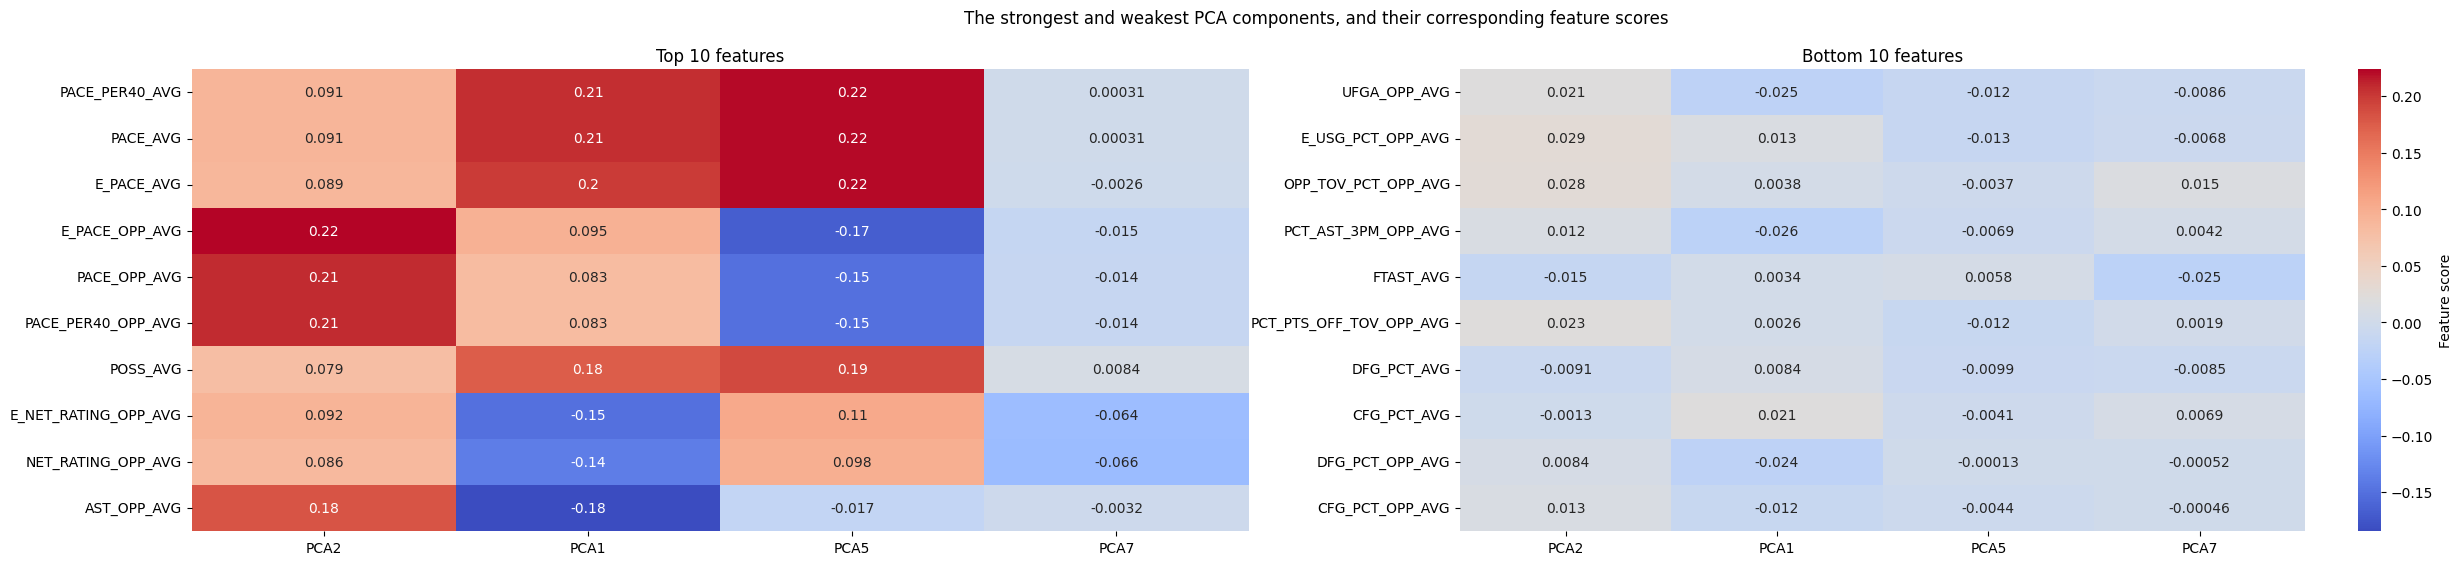

In [70]:
#keep only top 10 features + pca
cols_to_keep_top = ["PCA"] + top_10_features['feature'].values.tolist()
cols_to_keep_bottom = ["PCA"] + bottom_10_features['feature'].values.tolist()
plot_data_top = plot_data[cols_to_keep_top]
plot_data_bottom = plot_data[cols_to_keep_bottom]


vmin = min(plot_data_top.iloc[:,1:].min().min(), plot_data_bottom.iloc[:,1:].min().min())
vmax = max(plot_data_top.iloc[:,1:].max().max(), plot_data_bottom.iloc[:,1:].max().max())
fig, axs = plt.subplots(1, 2, figsize=(30, 6))
_ = sns.heatmap(plot_data_top.iloc[:,1:].T,
                xticklabels=plot_data_top["PCA"],
                yticklabels=plot_data_top.columns[1:],
                annot=True,
                ax=axs[0],
                vmin=vmin,
                vmax=vmax,
                cmap='coolwarm',
                cbar=False)

_ = sns.heatmap(plot_data_bottom.iloc[:,1:].T,
                xticklabels=plot_data_bottom["PCA"],
                yticklabels=plot_data_bottom.columns[1:],
                annot=True,
                ax=axs[1],
                vmin=vmin,
                vmax=vmax,
                cmap='coolwarm',
                cbar_kws={'label': 'Feature score'})

plt.suptitle("The strongest and weakest PCA components, and their corresponding feature scores")
axs[0].set_title("Top 10 features")
axs[1].set_title("Bottom 10 features")
plt.show()

Conclusions about the whitebox model:

The top 4 pca features (based on permutation importance) were the same for the train and test set as well, so I decided to focus on these when plotting the principal axes. Although the model does not perform well, the pca results are interesting. They bring pace as the most telling feature when trying to predict the spread of a game. 6 of the top 10 features for the best pca components are some sort of pace metrics. These were the pace metrics of both teams. Other metrics were possessions, the opponent's net ratings, and assists. Among the worst features were defensive and contested field goal percentages of both teams (DFG_PCT_VG, CFG_PCT_VG, DFG_PCT_OPP_VG, CFG_PCT_OPP_VG) and other special versions of simple statistics (e.g. PCT_PTS_OFF_TOV_OPP_AVG - The percentage of the opponent's points scored by a team that are scored on the possession after forcing a turnover). This could indicate that these are overcomplicating the simpler truths of a game.

# Explaining blackbox models

In [72]:
import shap

c:\Users\mibam\Documents\GitHub\predicting_nba_margin_of_victory\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
from keras.models import Sequential
from keras.layers import Dense
import keras

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
opt = keras.optimizers.AdamW(learning_rate=0.0002)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])

NN_model.load_weights('models/keras_checkpoint/Weights-101--10.41522.keras')


c:\Users\mibam\Documents\GitHub\predicting_nba_margin_of_victory\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\mibam\Documents\GitHub\predicting_nba_margin_of_victory\venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adamw', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [92]:
def predict_nn(X):
    return NN_model.predict(X).flatten()

explainer = shap.KernelExplainer(predict_nn, X_train_scaled[:50,:])
shap_values = explainer.shap_values(X_test_scaled[4,:], nsamples=500)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [93]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_scaled[4,:], feature_names=cols_needed)

In [ ]:
shap_values = explainer.shap_values(X_test_scaled, nsamples=500)

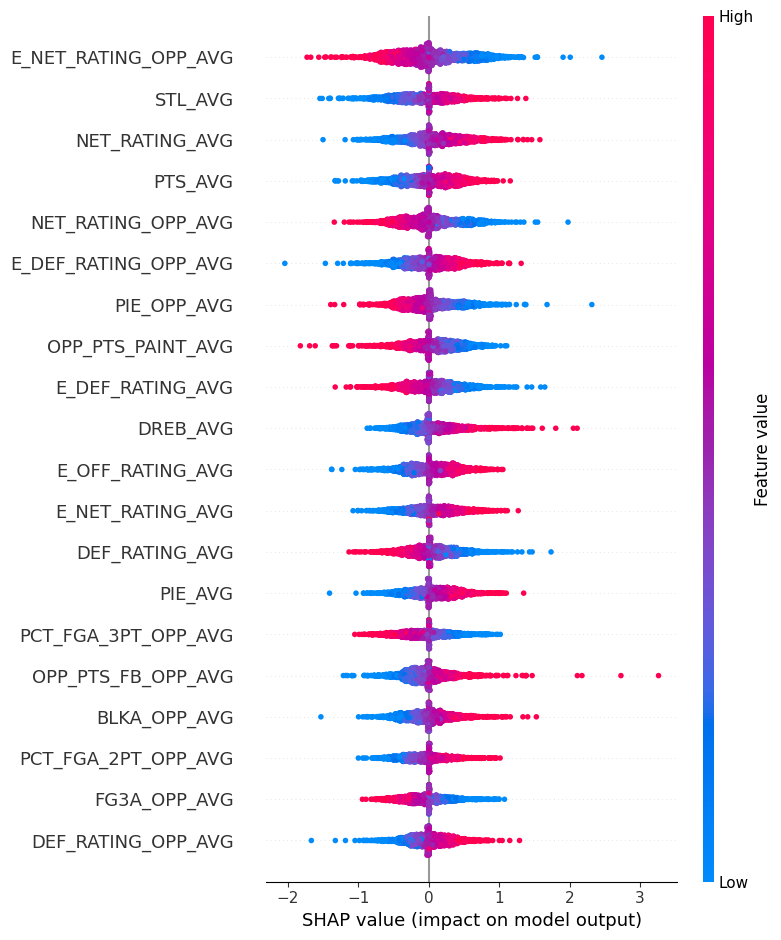

In [106]:
shap.summary_plot(shap_values, X_test_scaled, feature_names=cols_needed)

Conclusions of the blackbox model:

The blackbox model puts a very high emphasis on several "ratings". Defensive- and offensive ratings (E_NET_RATING_AVG - Average expected net rating of the team, DEF_RATING_OPP_AVG - Average defensive rating of the opponent, etc.). Another advanced statistic it uses, is PIE (Player Impact Estimate), both for the team and its opponent. It also uses defensive statistics related to blocks (BLKA_OPP_AVG - Average blocks against the opponent) and steals (STL_AVG - Average steals of the team), as well as rebounding (DREB_AVG - Average defensive rebounds of the team). These indicate that the model mixes a modern, and a more traditional approach. The "ratings" and PIE are more advanced statistics created to better evaluate a team or player, but rebounding, steals and blocks are the fundamental parts of basketball, and (especially defensive rebounding) is more about effort, than skill.
Another interesting observation that the model seems gives a better chance for a team when its opponent's shots come from 2s and not 3s: PCT_FGA_2PT_OPP_AVG (Average percentage of field goals attempted by the opponent that are 2 pointers) is high, and PCT_FGA_3PT_OPP_AVG (Average percentage of field goals attempted by the opponent that are 3 pointers) is low.

# Explaining greybox model

In [95]:
import tensorflow as tf

class Autoencoder(tf.keras.Model):
    def __init__(self, num_features, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(encoding_dim, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(num_features, activation='relu')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
ae = Autoencoder(num_features=X_train_scaled.shape[1], encoding_dim=32)
ae.compile(optimizer='adam', loss='mse')

ae.load_weights('models/autoencoder/ae_model.keras')

c:\Users\mibam\Documents\GitHub\predicting_nba_margin_of_victory\venv\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [96]:
xgb = joblib.load("models/greybox_models/xgboost_model.pkl")

In [97]:
def predict_grey_xgb(X):
    encoded = ae.encoder(X)
    return xgb.predict(encoded).flatten()

In [101]:
shap_xgb_explainer = shap.KernelExplainer(predict_grey_xgb, X_train_scaled[:50,:])
shap_values = shap_xgb_explainer.shap_values(X_test_scaled[4,:], nsamples=500)

In [102]:
shap.force_plot(shap_xgb_explainer.expected_value, shap_values, X_test_scaled[4,:], feature_names=cols_needed)

  0%|          | 0/1878 [00:00<?, ?it/s]

100%|██████████| 1878/1878 [32:41<00:00,  1.04s/it] 


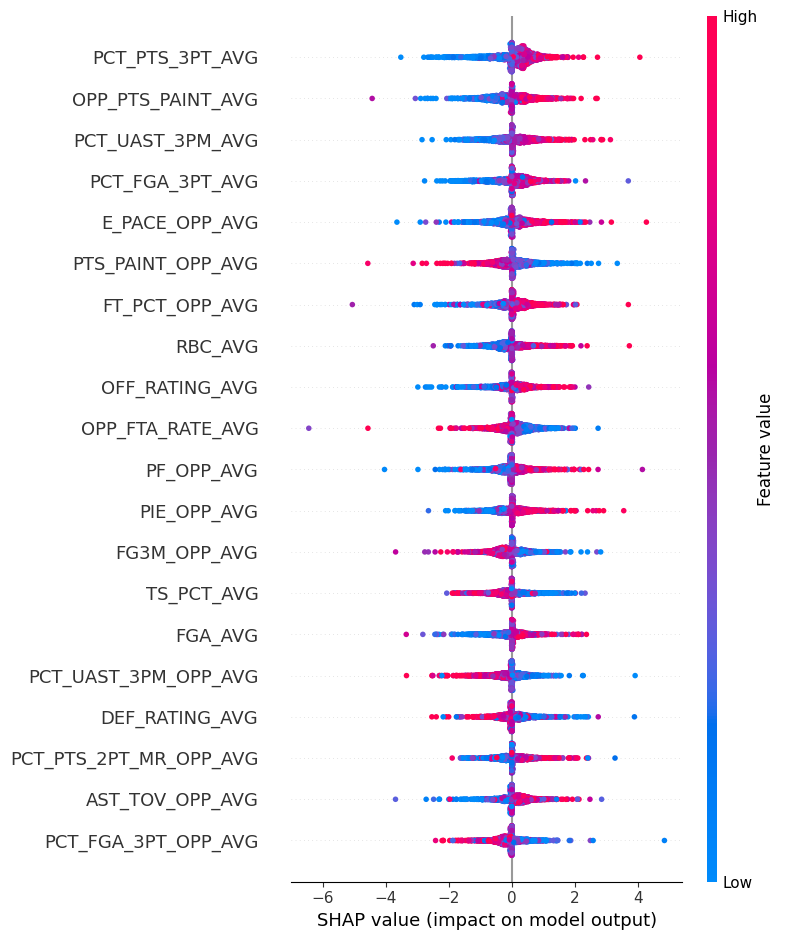

In [104]:
shap_values = shap_xgb_explainer.shap_values(X_test_scaled, nsamples=500)
shap.summary_plot(shap_values, X_test_scaled, feature_names=cols_needed)

Conclusions about the greybox approach:

The greybox model consists of an autoencoder, for efficient dimension reduction, and an xgboost regressor, for prediction. This "ensemble" model favours good 3 point shooting teams. Multiple related features display a positive impact on the model when it is high for the team(PCT_PTS_3PT_AVG - Average percentage of the team's points coming from 3 pointers, PCT_FGA_3PT_AVG - Average percentage of field goal attempts of the team being 3 pointers, PCT_UAST_3PM_AVG - Average percentage of made 3 pointers that were unassisted), and a negative one, when it is of its opponent. Defensive and offensive ratings are also present, with the expected impact (low offensive and high defensive ratings result in negative predictions). PIE and other metrics, like pace, true shooting (TS_PCT_AVG - Average true shooting percentage), free-throw rate (OPP_FTA_RATE_AVG - Average free-throw attempt rate of the opponent) and -shooting (FT_PCT_OPP_AVG - Average free-throw percentage of the opponent) are all statistics experts use to describe team profiles and explain game outcomes. The greybox model therefore uses statistics, that real life experts do, and predicts the game spreads with high efficiency (as seen in greybox_modeling.ipynb)

# Comparison of the explained models

In terms of performance, both the white- and blackbox approaches suffered from insufficient dimension reduction (or the lack of it). But when introducing non-linearity to it, in the form of an autoencoder, the graybox model gave excellent results.
After looking at the explanation of the outputs of these models, one could even say, that the greybox model takes what's good in the white- and blackbox approaches and uses them together, It uses the above-mentioned "ratings" (just like the blacbox model), together with pace (like the whitebox model). But it puts a bigger emphasis on shooting statistics. 
Overall, it resembles the blackbox model more, but it performs much better than it, using statistics that real-life experts use to infer team strength

# Ethics issues checklist

- Does this activity involve the development, deployment and/or use of Artificial Intelligence-based systems?
    - The models trained could be considered AI (according to the AI act law, they are). In a betting assistant settings, players should be informed that all suggestions are ai based.
- Could the AI based system/technique potentially stigmatise or discriminate against people?
    - The model itself, which predicts NBA game spreads, does not inherently stigmatise or discriminate against people as it is based on publicly available game data and not personal data.
- Does the AI system/technique interact, replace or influence human decision-making processes?
    - Yes, the model could influence human decision-making processes, particularly in the context of betting on NBA games. Users of the model might make betting decisions based on its predictions. In these cases, the model would not be able to place bets, only to make suggestions to the bettors, insuring that the final decision is theirs.
- Does the AI system/technique have the potential to lead to negative social and/or environmental impacts either through intended applications or plausible alternative uses?
    - Yes, there could be potential negative social impacts if the model is used for betting. It could contribute to gambling addiction, financial loss, and associated social problems. Releasing such a model into sportsbetting is ethically questionable, not just because of the mentioned potential negative effects, but because the fact that it is AI, could feed false hope to bettors that already suffer from addiction. It is unlikley however, that people will get addicted more easily because of a single model, as there are far more dangerous techniques to lure players in (e.g. "free" bets on platforms, that bettors can only use on that same platform as tokens, and can never "cash it out"). Regardless, bettors should be warned about the dangers of gampling addiction before using the model, and potentially be blocked, when they use it too frequently.
- Does the AI to be developed/used in the project raise any other ethical issues not covered by the questions above?
    - Other than the gambling addiction and financial loss problem, there is the issue of the fairness and transparency of the model. It’s important to ensure that the model’s predictions are accurate, and reliable. Bettors should be able to look at detailed evaluations of the model, before deciding on using its predictions.